<a href="https://colab.research.google.com/github/fabianoseller/-Estrutura-de-um-Projeto-/blob/main/C%C3%B3pia_de_Trabalho_Final_Fabiano_e_Gabriela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabalho Final - Aplicação de Técnicas Supervisionadas ou Não Supervisionadas em Bases Públicas
Vencimento Segunda-feira por 23:59 Pontos 40 Enviando um upload de arquivo
Trabalho Final – Ciência de Dados Aplicada
Tema: Aplicação de Técnicas Supervisionadas ou Não Supervisionadas em Bases Públicas
Objetivo
Desenvolver um projeto completo de ciência de dados utilizando uma base pública de dados, aplicando técnicas de aprendizado supervisionado (ex: regressão, classificação) ou não supervisionado (ex: clustering, regras de associação), com foco na interpretação dos resultados e em possíveis aplicações práticas.

Trabalho em Grupo
O trabalho pode ser realizado em grupos de até 3 alunos.

Os integrantes devem informar seus nomes completos no início do notebook ou relatório.

Escolha da Base de Dados
Os alunos devem selecionar uma base pública de dados de qualquer área de interesse (ex: industria, educação, economia, meio ambiente, mercado de trabalho, esportes, etc.).

Etapas do Trabalho
1. Identificação
Nome dos integrantes

Título do projeto

Link da base de dados utilizada

2. Exploração e Pré-processamento
Análise exploratória (EDA)

Tratamento de dados faltantes e variáveis categóricas

Normalização ou padronização, se necessário

3. Modelagem
Escolha de técnica supervisionada ou não supervisionada

Justificativa da escolha

Aplicação do(s) modelo(s)

Ajuste de hiperparâmetros (se aplicável)

4. Avaliação
Métricas adequadas ao tipo de tarefa;

Visualizações dos resultados

Interpretação dos resultados e implicações práticas

5. Reflexão Crítica
Limitações do modelo

Possíveis aplicações reais

Sugestões de melhoria ou extensão futura

Entrega
O grupo deverá entregar um notebook ou relatório contendo:

Nome dos integrantes

Código comentado

Visualizações

Interpretação dos resultados

Data de entrega: até 11/11/2025

<h1>Pontificia Universidade Católica de Minas Gerais</h1>
<h2>PÓS-GRADUAÇÃO EM ESTATÍSTICA PARA CIÊNCIA DE DADOS</h2>
<h3>Disciplina: Machine Learning</h3>
<h4>Trabalho Final - Classificação de Câncer de Mama com o Wisconsin Breast Cancer Dataset</h4>
<h5>Professor: Maurício Rodrigues da Silva</h3>
<h5>Alunos: Fabiano Antunes e Gabriela Araújo Santos</h3>

**Descrição da base**

O Wisconsin Breast Cancer Dataset reúne informações de características celulares obtidas de imagens de biópsias de mama. Cada amostra é rotulada como benigna ou maligna, permitindo a aplicação de modelos de classificação supervisionada. A base conta com 569 registros e 30 atributos, sendo amplamente utilizada para estudos de predição e interpretação de modelos em saúde.

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download

In [ ]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importando as bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, recall_score

## 🧮⚙️ **PREPARAÇÃO DOS DADOS**

In [ ]:
#Caminho no meu drive -- utilizei o google colab
#ajustar o caminho conforme sua pasta do drive
file_path = "/content/drive/MyDrive/Colab Notebooks/PÓS GRADUAÇÃO 2025/Machine Learning/trabalho final/data.csv"

# Carregando o dataset a partir do arquivo local.
df = pd.read_csv(file_path, sep = ',')

In [ ]:
# Dicionário de Dados para referência
data_dict = {
    'radius': 'Distância média do centro ao perímetro do núcleo (tamanho)',
    'texture': 'Variação dos níveis de cinza da imagem (heterogeneidade)',
    'perimeter': 'Perímetro do núcleo celular',
    'area': 'Área do núcleo celular',
    'smoothness': 'Variação local do raio (suavidade ou irregularidade da borda)',
    'compactness': 'Relação entre perímetro² e área (grau de compacidade)',
    'concavity': 'Profundidade das concavidades nas bordas do núcleo',
    'concave_points': 'Quantidade de pontos de concavidade (irregularidades)',
    'symmetry': 'Grau de simetria da forma do núcleo',
    'fractal_dimension': 'Complexidade da borda medida pela dimensão fractal',
    'obs': 'Para cada variável acima existem três versões: mean (valor médio), se (erro padrão) e worst (maior valor observado)',
    'diagnosis': 'Diagnóstico do tumor (M = maligno, B = benigno)'
}

markdown_text = "### Dicionário de Dados\n"
for key, value in data_dict.items():
    markdown_text += f"- **{key}**: {value}\n"

display(Markdown(markdown_text))

### Dicionário de Dados
- **radius**: Distância média do centro ao perímetro do núcleo (tamanho)
- **texture**: Variação dos níveis de cinza da imagem (heterogeneidade)
- **perimeter**: Perímetro do núcleo celular
- **area**: Área do núcleo celular
- **smoothness**: Variação local do raio (suavidade ou irregularidade da borda)
- **compactness**: Relação entre perímetro² e área (grau de compacidade)
- **concavity**: Profundidade das concavidades nas bordas do núcleo
- **concave_points**: Quantidade de pontos de concavidade (irregularidades)
- **symmetry**: Grau de simetria da forma do núcleo
- **fractal_dimension**: Complexidade da borda medida pela dimensão fractal
- **obs**: Para cada variável acima existem três versões: mean (valor médio), se (erro padrão) e worst (maior valor observado)
- **diagnosis**: Diagnóstico do tumor (M = maligno, B = benigno)


In [ ]:
#Lendo as primeiras 5 linhas da base
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# A última coluna é uma coluna vazia, criada durante a importação de dados, por isso podemos retirá-la
df = df.drop(columns=['Unnamed: 32'])

In [ ]:
#Lendo novamente as primeiras 5 linhas da base
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Tamanho do DataFrame
print("\nTamanho do DataFrame:")
print(df.shape)


Tamanho do DataFrame:
(569, 32)


In [ ]:
#Analisando o formato da base
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### 🔎 **Análises Inciais**
- A base não tem valores faltantes;
- A variável *diagnosis* é categórica binária (M = maligno / B = benigno) e as demais são numéricas contínuas


### 🔎📈 **ANÁLISE EXPLORATÓRIA - EDA**

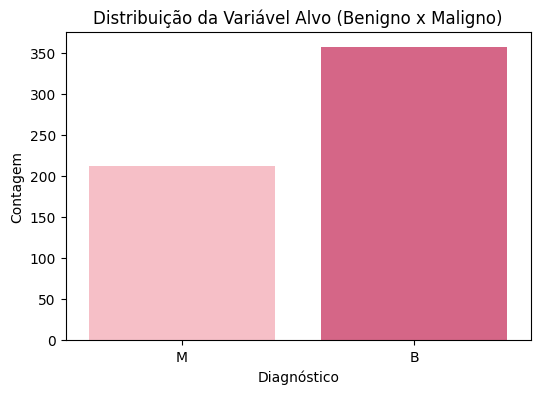

In [ ]:
# Distribuição da variável-alvo
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis',hue='diagnosis', data=df, legend=False,
              palette=['#ffb6c1', '#e75480'])
plt.title('Distribuição da Variável Alvo (Benigno x Maligno)')
plt.xlabel('Diagnóstico')
plt.ylabel('Contagem')
plt.show()


O gráfico mostra que o conjunto de dados é desbalanceado: há bem mais casos benignos do que malignos. Esse desequilíbrio pode levar modelos de classificação a favorecer a classe majoritária, resultando em bons valores de acurácia, mas baixo desempenho na identificação de tumores malignos — justamente os casos mais importantes do ponto de vista clínico.

#### **Histogramas Variáveis Contínuas**

Como a base possui 30 variáveis numéricas, gerar gráficos para todas deixaria a análise confusa e pouco útil. Por isso, usamos *skewness e kurtosis* para identificar as variáveis com distribuições mais informativas. Assim, exibimos apenas as que mais se destacam, tornando a EDA mais clara e objetiva.

Variáveis selecionadas: ['area_se', 'concavity_se', 'fractal_dimension_se', 'perimeter_se', 'radius_se', 'smoothness_se', 'symmetry_se', 'compactness_se', 'texture_se', 'fractal_dimension_worst']


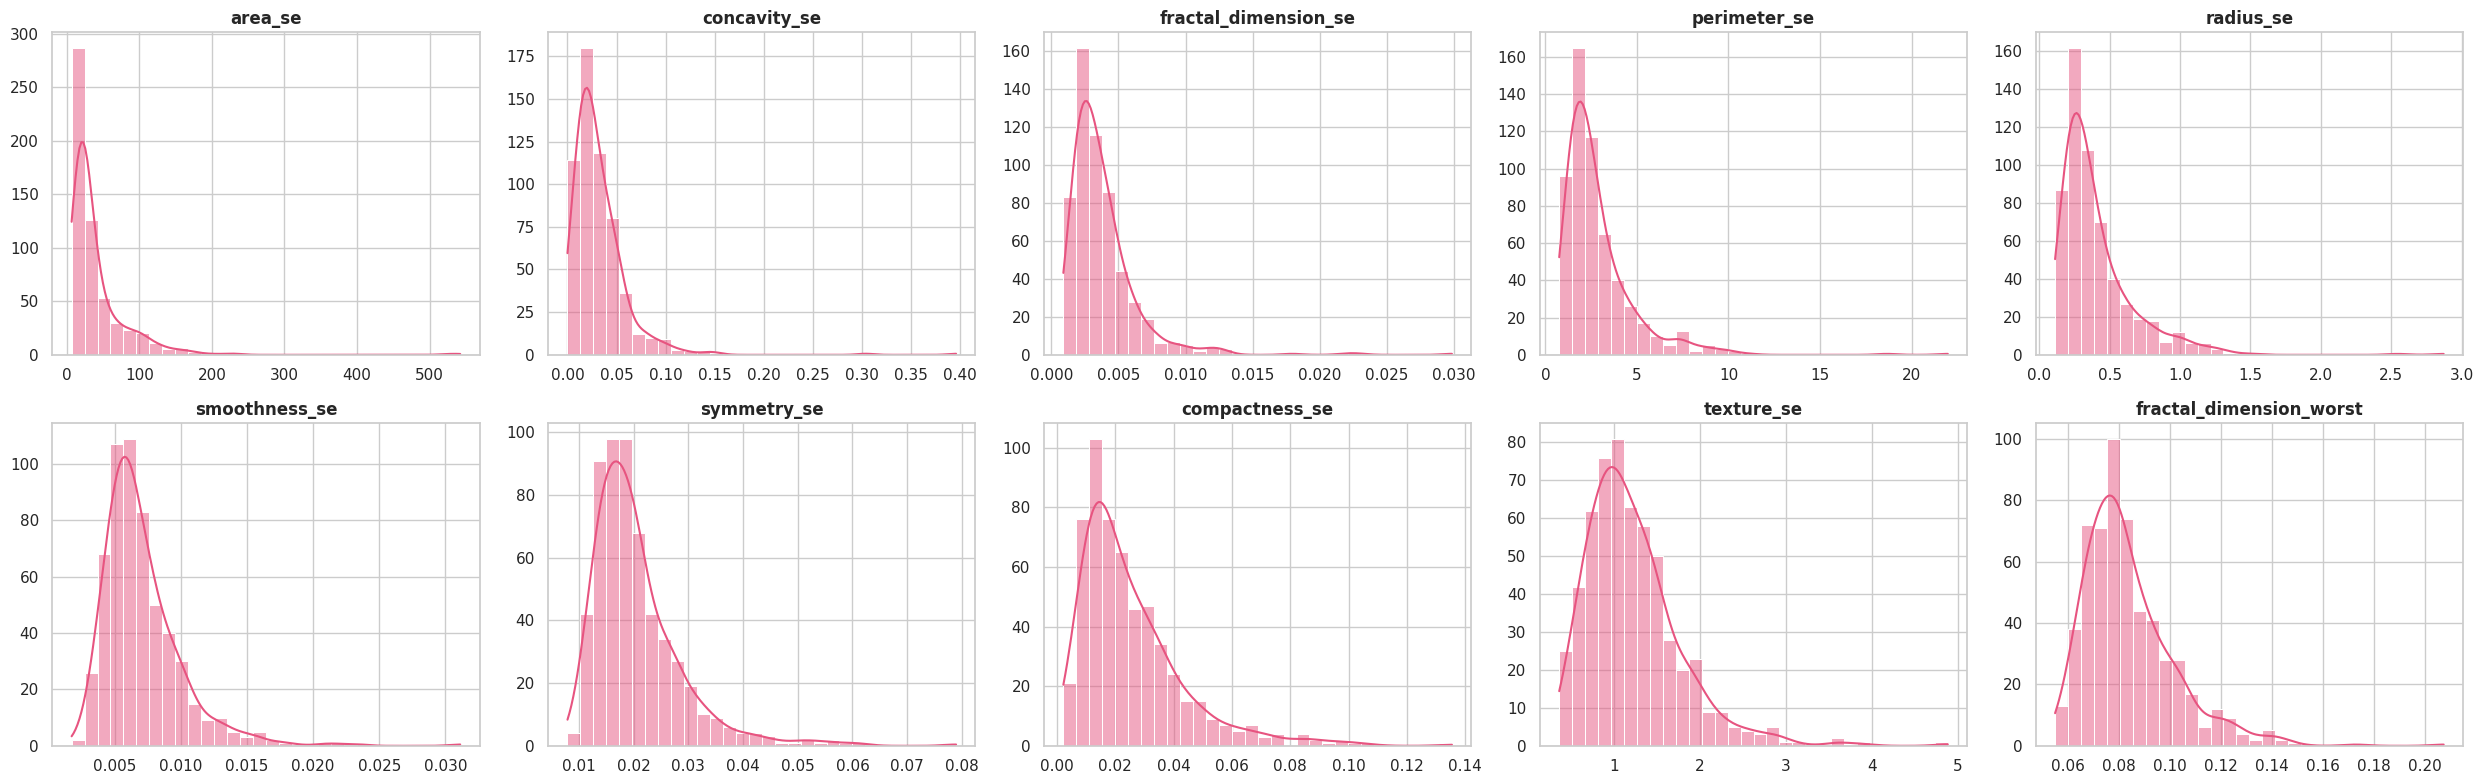

In [ ]:
# ============================================
# 1. Calcular skewness e kurtosis
# ============================================

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Remover 'id'
## como é uma coluna de identificação, não é explicativa, mas pode ocorrer de aparecer como alta correlação. Para evitar isso, já retiramos ela da análise
numeric_cols = [col for col in numeric_cols if col.lower() != 'id']

skew_vals = df[numeric_cols].skew()
kurt_vals = df[numeric_cols].kurtosis()

stats_df = pd.DataFrame({
    'skewness': skew_vals,
    'kurtosis': kurt_vals
})

# Score de "interessância"
stats_df["interest_score"] = abs(stats_df["skewness"]) + abs(stats_df["kurtosis"])

# Ordenar da mais interessante para a menos
stats_df_sorted = stats_df.sort_values("interest_score", ascending=False)

# Selecionar quantas você quer visualizar
top_n = 10
top_vars = stats_df_sorted.head(top_n).index.tolist()

print("Variáveis selecionadas:", top_vars)

# ============================================
# 2. Plotar histogramas usando tons de rosa
# ============================================

sns.set(style="whitegrid")

n_cols = 5
n_rows = (len(top_vars) + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(top_vars, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=30, kde=True, color="#e75480")
    plt.title(col, fontsize=12, weight="bold")
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()



As variáveis selecionadas capturam aspectos de heterogeneidade, irregularidade e variação interna do tumor — características frequentemente relacionadas ao câncer maligno.
Por apresentarem maior assimetria e caudas longas, elas representam medidas altamente informativas para a modelagem e deverão contribuir para distinguir bem entre diagnósticos benignos e malignos

-  **area_se, radius_se, perimeter_se:** mostram grande instabilidade no tamanho em alguns casos, sugerindo possível malignidade.
- **concavity_se, compactness_se, symmetry_se, smoothness_se:** refletem irregularidades do contorno e maior heterogeneidade estrutural, úteis para distinguir tumores suspeitos.
-**fracture_dimension_se e worst:** indicam complexidade geométrica elevada em poucos casos, associada a maior agressividade.
- **texture_se:** apresenta variabilidade moderada, mas ainda relevante para diferenciar tumores homogêneos de heterogêneos.

#### **Boxplots Variáveis Contínuas**

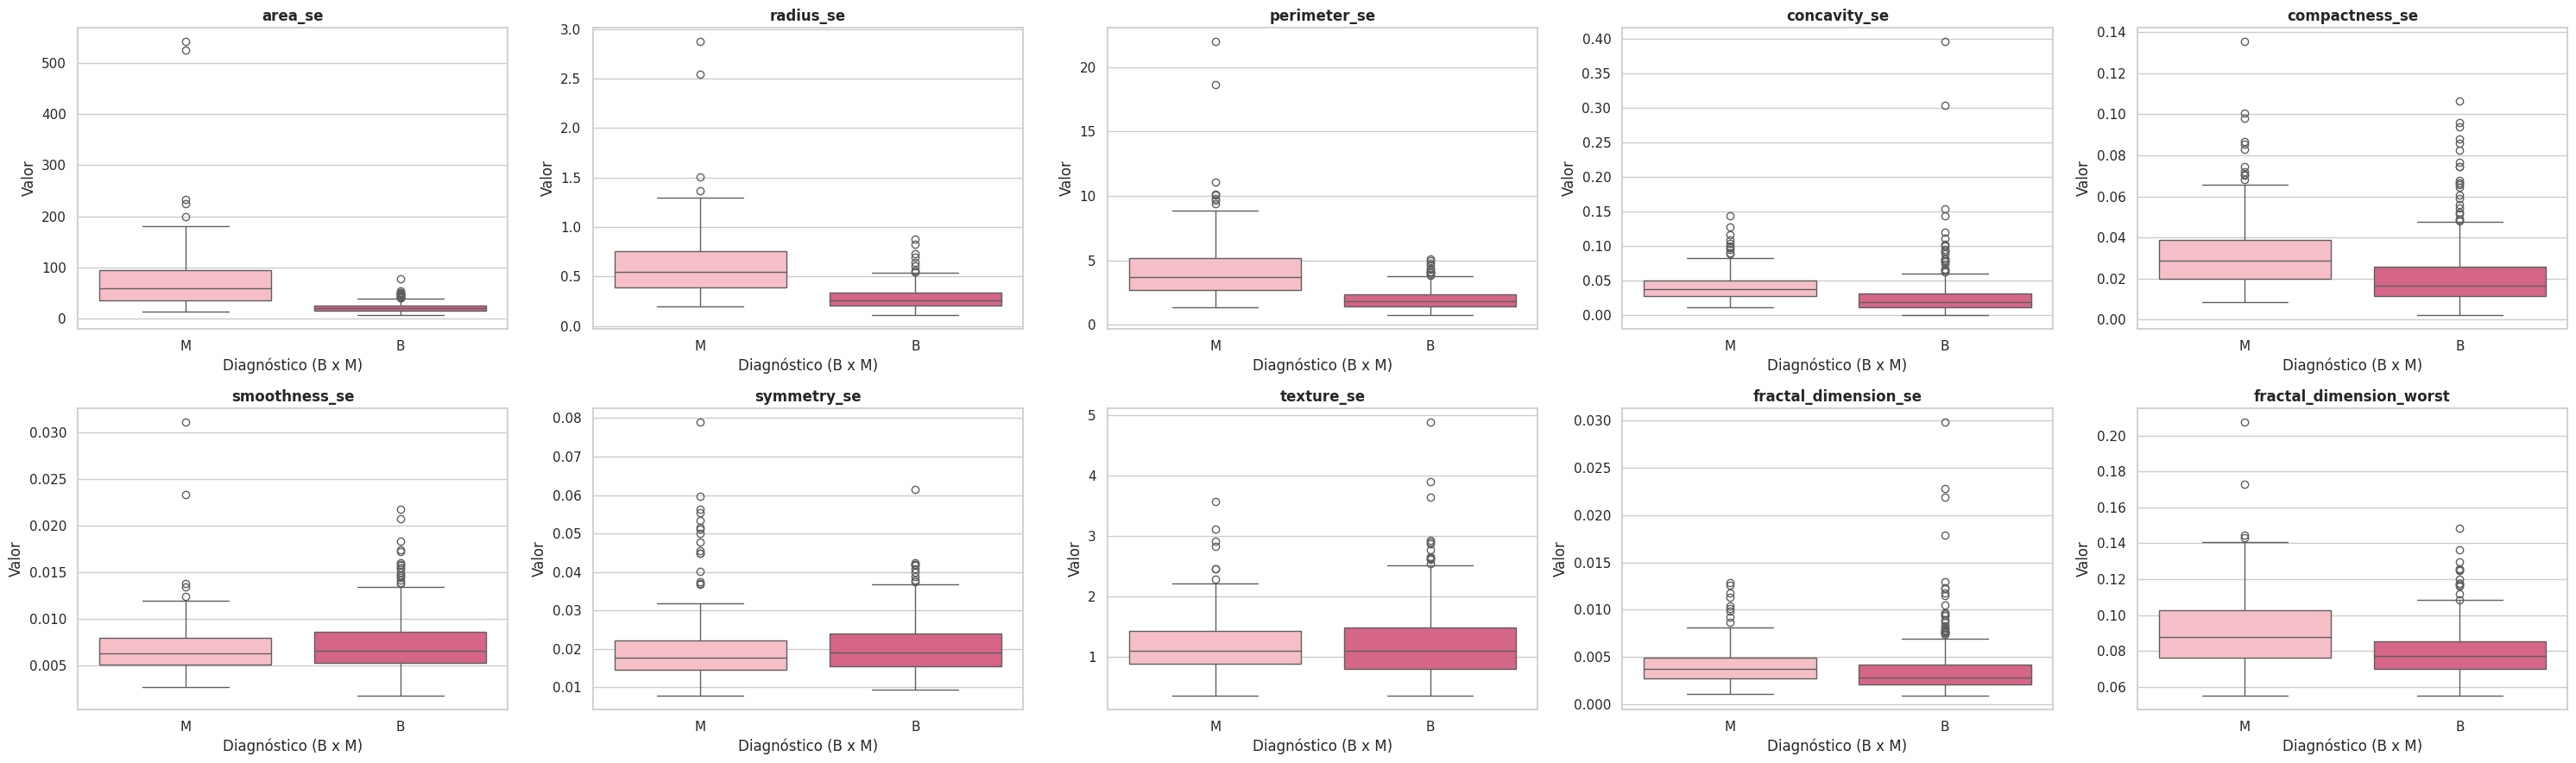

In [ ]:
## Boxplots por classe (Benigno vs Maligno)
  # Gera boxplots separados por diagnóstico para  as variáveis numéricas mais relevantes


# Grupo de variáveis selecionadas
vars_grupo = [
    'area_se', 'radius_se', 'perimeter_se',
    'concavity_se', 'compactness_se', 'smoothness_se', 'symmetry_se',
    'texture_se',
    'fractal_dimension_se', 'fractal_dimension_worst'
]

# Estilo rosa (mesma paleta usada antes)
sns.set(style="whitegrid")
palette = ['#ffb6c1', '#e75480']  # Benigno - Maligno

# Tamanho do grid
n_cols = 5
n_rows = int(len(vars_grupo) / n_cols) + (len(vars_grupo) % n_cols > 0)

plt.figure(figsize=(6 * n_cols, 4.5 * n_rows))

for i, col in enumerate(vars_grupo, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(
        data=df,
        x='diagnosis',
        hue='diagnosis',
        y=col,
        palette=palette,
        legend = False
    )
    plt.title(col, fontsize=12, weight='bold')
    plt.xlabel("Diagnóstico (B x M)")
    plt.ylabel("Valor")

plt.tight_layout()
plt.show()

Todos os boxplots sugerem que tumores malignos apresentam maior erro-padrão nas características celulares, indicando maior heterogeneidade, irregularidade e instabilidade morfológica.Isso já sugere que modelos de classificação terão bom desempenho, pois há diferenças estatísticas claras entre os grupos.
O ChatGPT disse:

As variáveis ligadas ao tamanho e ao formato das células apresentam valores claramente maiores e mais dispersos nos tumores malignos, refletindo maior irregularidade, complexidade e variabilidade estrutural. Mesmo nos atributos com menor separação, como texture_se, a tendência de maior variabilidade em tumores malignos permanece, diferenciando-os dos tumores benignos.

#### **Matriz de Correlação mostrando apenas correlações fortes**
Como são muitas variáveis, optamos por destacar na matriz aapenas aquelas com correlações significativas

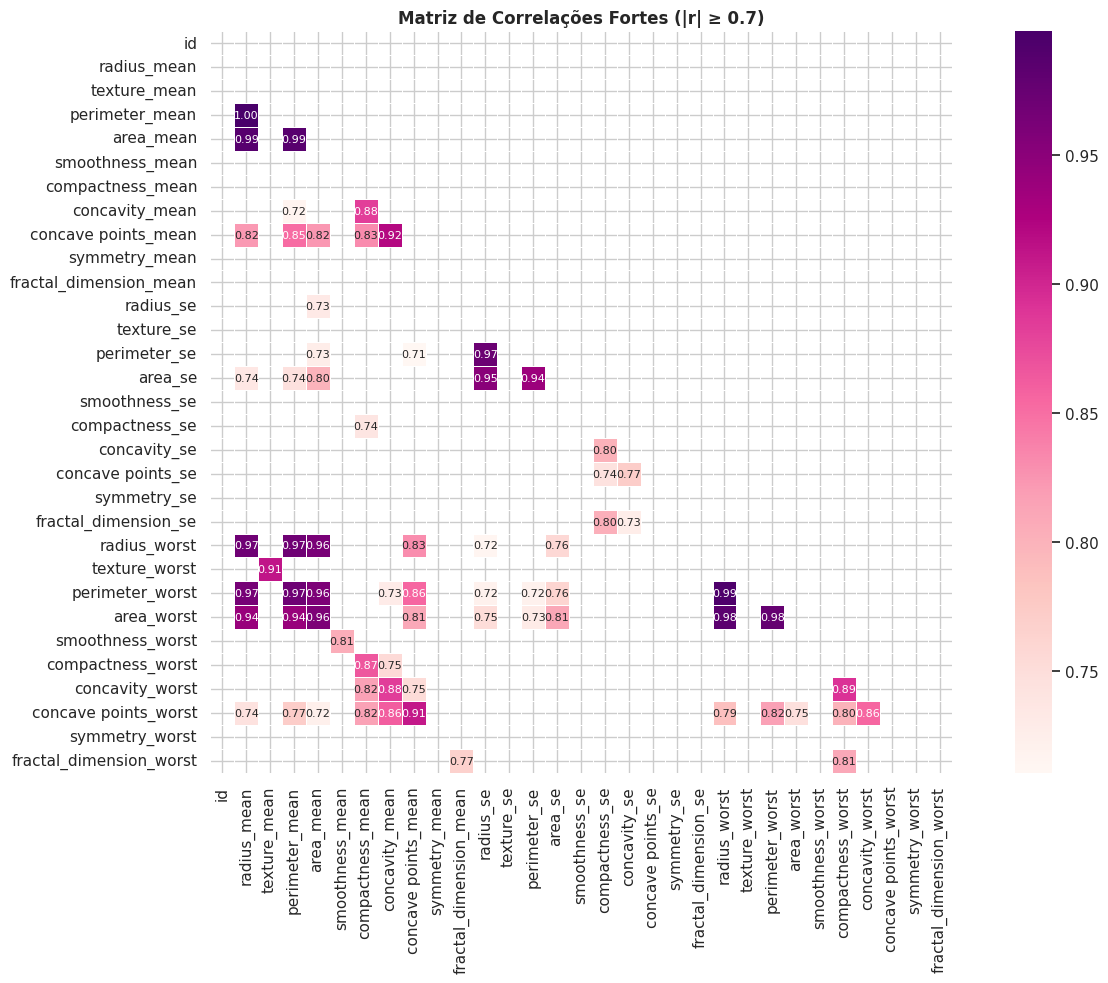

In [ ]:
## Matriz de correlação – apenas correlações fortes (|r| ≥ 0.7)

# Remove coluna ID, se existir
df_corr = df.drop(columns=['ID'], errors='ignore')

# Seleciona apenas variáveis numéricas
df_corr = df_corr.select_dtypes(include=['number'])

# Calcula correlação
corr = df_corr.corr()

# Mantém apenas correlações fortes
strong_corr = corr.copy()
strong_corr[(strong_corr.abs() < 0.7)] = np.nan   # filtra |r| < 0.7

# Máscara para ocultar o triângulo inferior
mask = np.triu(np.ones_like(strong_corr, dtype=bool))

# Plot
plt.figure(figsize=(14, 10))
sns.heatmap(
    strong_corr,
    mask=mask,
    cmap='RdPu',
    annot=True,           # mostra os valores
    annot_kws={"size": 8},
    fmt=".2f",
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar=True
)

plt.title("Matriz de Correlações Fortes (|r| ≥ 0.7)", fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

###  🔧 **Tratamento das Variáveis**

- Como apenas a variável de interesse é categórica, vamos transformá-la em 0 e 1(M = 1; B = 0)


In [ ]:
# Mapeando variável categórica diagnosis
# M = maligno (1)
# B = benigno (0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

print("\nValores únicos após mapeamento da variável alvo:")
print(df['diagnosis'].unique())


Valores únicos após mapeamento da variável alvo:
[1 0]


### 🔄 **Padronização**

- As variáveis numéricas têm escalas muito diferentes (ex.: area pode ser 1000; smoothness é ~0.1)
- Para padronização usaremos StandardScaler
- 👉 Importante: o scaler deve ser ajustado somente no treino, para evitar data leakage.

In [ ]:
# Variável-alvo
y = df['diagnosis']

# Atributos (X)
X = df.drop(columns=['diagnosis', 'ID'], errors='ignore')


# Divisão treino/teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Inicializando o scaler
scaler = StandardScaler()

# Ajusta no TREINO e transforma
X_train_scaled = scaler.fit_transform(X_train)

# Transforma apenas o TESTE
X_test_scaled = scaler.transform(X_test)

print("Padronização concluída!")
print("Tamanho treino:", X_train_scaled.shape)
print("Tamanho teste:", X_test_scaled.shape)

Padronização concluída!
Tamanho treino: (398, 31)
Tamanho teste: (171, 31)


## 🤖📈 **Modelagem**

A variável-alvo diagnosis indica dois possíveis resultados:

- 0 = benigno

- 1 = maligno

Portanto, trata-se de um problema de aprendizado supervisionado de **classificação binária**.

🥇 **Modelo escolhido: Support Vector Machine (SVM) com kernel RBF (Radial Basis Function)**


- Motivos da escolha do SVM com kernel RBF:

  - ✔️ **Alta performance em bases com muitas variáveis**:
  O conjunto possui 30 variáveis numéricas que usaremos como explicativas, e o SVM é reconhecido por lidar de maneira extremamente eficiente com dados em média ou alta dimensionalidade.


  - ✔️ **Excelente capacidade de separação não linear**:
  A distinção entre tumores benignos e malignos não é perfeitamente linear. O kernel RBF permite que o SVM capture padrões complexos e relações não lineares entre os atributos, aumentando significativamente a capacidade de decisão do modelo.

  - ✔️ **Compatibilidade ideal com dados padronizados**:
  Como aplicamos a padronização utilizando StandardScaler, o SVM opera em sua configuração mais favorável, garantindo estabilidade e melhor performance do classificador.


- Diante desses fatores, o SVM com kernel RBF se apresenta como uma escolha robusta, eficiente e amplamente validada para a classificação de tumores mamários benignos e malignos.

### 🏋️‍♀️🚀**Treinamento e aplicação do modelo**

In [ ]:
# Modelo com kernel RBF
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)

# Treinamento
svm_rbf.fit(X_train_scaled, y_train)

# Previsões
y_pred_svm = svm_rbf.predict(X_test_scaled)

# Avaliação
print("Acurácia - SVM (RBF):", accuracy_score(y_test, y_pred_svm))
print("\nRelatório de Classificação (SVM - RBF):\n")
print(classification_report(y_test, y_pred_svm))

Acurácia - SVM (RBF): 0.9649122807017544

Relatório de Classificação (SVM - RBF):

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



### 🛠️**Ajuste de Hiperparâmetros**

O SVM tem dois hiperparâmetros essenciais:

- C : controla margem e penalidade por erros

- gamma : controla alcance da influência dos pontos

Vamos testar diferentes combinações:

In [ ]:
# Definindo conjunto de hiperparâmetros a testar
param_grid = {
    'C': [0.1, 1, 10, 100],                  # Teste de diferentes forças de regularização
    'gamma': ['scale', 0.1, 0.01, 0.001],    # Diferentes ampliações da função kernel RBF
    'kernel': ['rbf'],                       # Kernel fixado como RBF
    'probability': [True]                    # ESSENCIAL para permitir predict_proba
}

# Configuração da busca em grade
grid_svm = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Ajuste do modelo utilizando os dados padronizados de treino
grid_svm.fit(X_train_scaled, y_train)

# Exibição dos melhores parâmetros encontrados
print("Melhores parâmetros encontrados:", grid_svm.best_params_)

# Exibição da melhor acurácia média obtida na validação cruzada
print("Melhor acurácia na validação cruzada:", grid_svm.best_score_)

Melhores parâmetros encontrados: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}
Melhor acurácia na validação cruzada: 0.9722151898734179


### 🏋️‍♀️🚀 **Treinar o modelo final com os melhores parâmetros**

In [ ]:
best_svm = grid_svm.best_estimator_

best_svm.fit(X_train_scaled, y_train)

y_pred_best = best_svm.predict(X_test_scaled)

print("Acurácia do SVM (melhor modelo):", accuracy_score(y_test, y_pred_best))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_best))

Acurácia do SVM (melhor modelo): 0.9649122807017544

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



**Matriz de confusão modelo otimizado**

<Figure size 600x400 with 0 Axes>

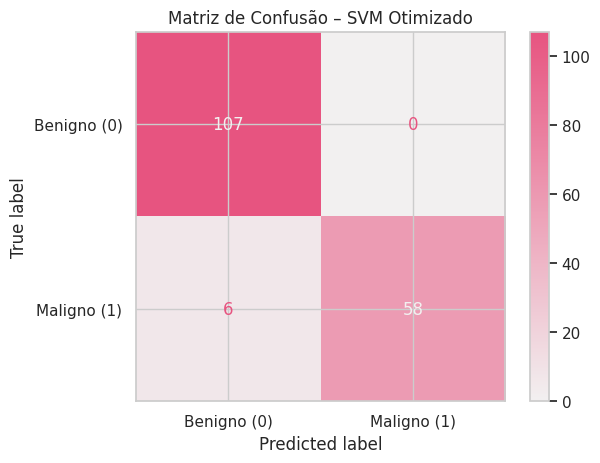

In [ ]:
cm = confusion_matrix(y_test, y_pred_best)

cmap_rosa = sns.light_palette("#e75480", as_cmap=True)  # rosa claro → escuro

plt.figure(figsize=(6,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno (0)", "Maligno (1)"])
disp.plot(cmap=cmap_rosa)
plt.title("Matriz de Confusão – SVM Otimizado")
plt.show()

**Curva ROC**

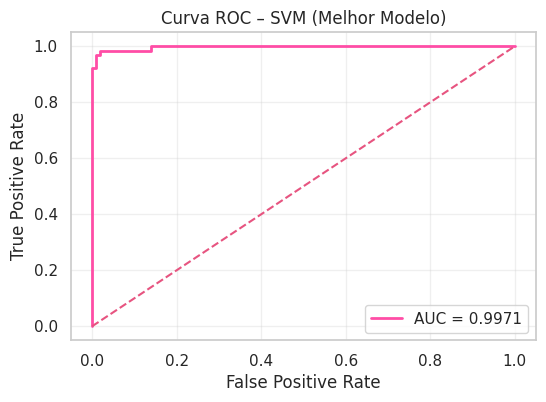

In [ ]:
# --- Probabilidades (necessário para a ROC) ---
try:
    y_proba_best = best_svm.predict_proba(X_test_scaled)[:, 1]
except:
    raise ValueError(
        "Seu SVM não possui predict_proba(). "
        "Inclua probability=True no GridSearch antes de treinar."
    )

# --- Curva ROC ---
fpr, tpr, thresholds = roc_curve(y_test, y_proba_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr,color="#ff4da6", label=f"AUC = {roc_auc:.4f}", linewidth=2)
plt.plot([0,1], [0,1], linestyle="--", color="#e75480")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC – SVM (Melhor Modelo)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


**Tabela comparativa entre os dois modelos**

In [ ]:
acc_simple = accuracy_score(y_test, y_pred_svm)
acc_best = accuracy_score(y_test, y_pred_best)

comparacao = pd.DataFrame({
    "Modelo": ["SVM Simples", "SVM Otimizado"],
    "Acurácia": [acc_simple, acc_best]
})

print("\n📝 Comparação entre modelos:\n")
print(comparacao)


📝 Comparação entre modelos:

          Modelo  Acurácia
0    SVM Simples  0.964912
1  SVM Otimizado  0.964912


#### 🧠🎯 **Interpretação do modelo e suas métricas**

- O SVM otimizado apresentou:

   - **Alta capacidade discriminativa** (AUC = 0,997);

   - **Excelente acurácia** (96,5%);

   - **Zero falsos positivos para malignos** (nenhum benigno foi classificado como maligno);

   - **Baixa taxa de falsos negativos** (6 casos), embora sejam o principal ponto de atenção clínica;

   - **Especificidade/precision do tumor maligno (classe 1)** = 1.00, ou seja, todas as previsões de malignidade estavam corretas;

   - **Sensibilidade de 0,91:** recall = 0.91 para malignos — indicando que 9% desses casos passaram despercebidos

Ambas as classes apresentam F1-Score acima de 0.95, o que evidencia equilíbrio entre precisão e sensibilidade.

- No contexto de diagnóstico de câncer de mama, **o modelo demonstra desempenho robusto e confiável, mas esforços adicionais poderiam focar em reduzir falsos negativos**

- A acurácia do SVM simples e do SVM otimizado foi praticamente idêntica, indicando que o modelo básico já capturava bem o padrão dos dados. Ainda assim, a versão otimizada tende a oferecer melhor separação entre classes e maior robustez, mesmo quando o ganho em acurácia é mínimo.


##### 📌 **Implicações práticas**
- No contexto real de apoio ao diagnóstico do câncer de mama, um modelo como o SVM otimizado pode desempenhar um papel importante na triagem inicial de casos suspeitos, ajudando equipes médicas a priorizar exames que exigem atenção urgente. Ao automatizar a análise de características celulares e indicar, com alta precisão, a probabilidade de malignidade, o modelo reduz a carga de trabalho dos profissionais, permitindo que radiologistas e patologistas direcionem seu tempo para os casos mais complexos. Além disso, essa ferramenta pode funcionar como um sistema de apoio à decisão, oferecendo uma segunda opinião quantitativa que diminui a chance de erros humanos e acelera o fluxo diagnóstico, contribuindo para intervenções mais rápidas e potencialmente melhores desfechos clínicos.

#### 💭🧠 **Reflexão Crítica**

- Embora o modelo SVM otimizado tenha apresentado desempenho excelente, ele ainda possui algumas limitações importantes. Uma delas é a presença de falsos negativos, que, apesar de poucos, representam um risco clínico relevante, já que casos malignos classificados como benignos podem atrasar o diagnóstico. Além disso, o modelo depende fortemente da qualidade e representatividade da base utilizada; como o dataset é relativamente pequeno e bem balanceado, pode não refletir a variabilidade real encontrada em ambientes hospitalares, onde ruídos, diferentes equipamentos e populações mais heterogêneas podem afetar a performance.

- Apesar dessas limitações, o modelo possui potencial de aplicação prática, especialmente como ferramenta de triagem em sistemas de apoio à decisão clínica. Ele pode auxiliar patologistas e radiologistas na priorização de biópsias suspeitas, acelerar o fluxo diagnóstico e servir como uma segunda opinião automatizada, reduzindo a carga de trabalho e contribuindo para diagnósticos mais rápidos e consistentes.

- Para melhorar ou ampliar o projeto, futuras extensões podem incluir o teste de modelos adicionais, como Random Forest, Gradient Boosting ou Redes Neurais, que podem capturar relações mais complexas entre as variáveis. Além disso, a expansão da base de dados e a validação externa em outros conjuntos também seriam passos importantes para aumentar a robustez e a aplicabilidade do modelo no mundo real.